In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Imports

In [1]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv,pinv,LinAlgError

# Loading Dataset

In [2]:
# Load The Dataset
x, y = datasets.load_boston(return_X_y=True)
x.shape
df = pd.DataFrame(x)
df.head()

df = pd.DataFrame(y)
df.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# Train Data

In [4]:
#Train data
x_train_temp=x[0:400,:]
x_train=np.zeros((x_train_temp.shape[0],x_train_temp.shape[1]+1))
x_train[:,0]=np.ones((x_train_temp.shape[0]))
x_train[:,1:]=x_train_temp
"Type of X_train:", type(x_train), "Shape of X_train:", x_train.shape
y_train=y[0:400]

# Test Data

In [5]:
#Test Data
x_test_temp=x[400:,:]
x_test=np.zeros((x_test_temp.shape[0],x_test_temp.shape[1]+1))
x_test[:,0]=np.ones((x_test_temp.shape[0]))
x_test[:,1:]=x_test_temp
"Type of X_train:", type(x_test), "Shape of X_train:", x_test.shape
y_test=y[400:]

# Scaling

In [9]:
# Scaling the data
scaler=StandardScaler()
scaler.fit(x_train[:,1:])
x_train[:,1:]=scaler.transform(x_train[:,1:])
x_test[:,1:]=scaler.transform(x_test[:,1:])

# Intialization

In [13]:
mae_list = []; mse_list = []; theta_list = []; lamda_list = [10,100,500,1000,10000]

# Normal Equation method

In [14]:
for lamda in lamda_list:
    matrix = np.zeros((x_train.shape[1],x_train.shape[1]))
    for i in range(1,x_train.shape[1]):
        matrix[i][i] = 1

    theta=np.zeros(x_train.shape[1])
    try:
        theta = np.dot((inv(np.dot(x_train.T,x_train) + lamda * matrix)),(np.dot(x_train.T,y_train)))
    except LinAlgError:
        theta = np.dot((pinv(np.dot(x_train.T,x_train) + lamda * matrix)),(np.dot(x_train.T,y_train)))
    df = pd.DataFrame(theta)

    predictions = np.dot(theta,x_test.T)
    mae = metrics.mean_absolute_error(y_true = y_test, y_pred = predictions)
    mse = metrics.mean_squared_error(y_true = y_test, y_pred = predictions)
    print("Lambda : ",lamda)
    print("Mean Absolute Error : ", mae)
    print("Mean Squared Error : ", mse,end = "\n\n")
    mae_list.append(mae)
    mse_list.append(mse)

Lambda :  10
Mean Absolute Error :  4.883844986488974
Mean Squared Error :  34.30419378056596

Lambda :  100
Mean Absolute Error :  4.096129594076955
Mean Squared Error :  24.816356919692886

Lambda :  500
Mean Absolute Error :  3.911127702361726
Mean Squared Error :  22.710781842401175

Lambda :  1000
Mean Absolute Error :  4.338044083817769
Mean Squared Error :  28.043478725199996

Lambda :  10000
Mean Absolute Error :  7.5565997545923045
Mean Squared Error :  76.24464991304006



# MAE VS Lambda

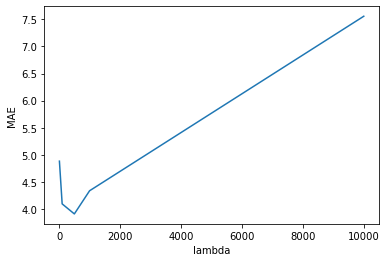

In [16]:
plt.plot(lamda_list,mae_list)
plt.xlabel("lambda")
plt.ylabel("MAE")
plt.show()